In [56]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
! ls ../data/raw

dump_vancouver-bc.csv     dump_vancouver-bc.csv.dvc


In [37]:
columns_to_drop = ["Unnamed: 0", "listing_status", "brokerage_homepage", "viewings", "pl_url", "external", "amenity_json",  "rating", "is_filter_ad", "max_children", "max_adults", "pet_policy_json"]

In [38]:
raw_df = pd.read_csv("../data/raw/dump_vancouver-bc.csv", index_col="listing_id").drop(columns=columns_to_drop)

In [39]:
[x for x in raw_df.columns if "min" in x or "max" in x]

['max_price',
 'min_price',
 'max_bedrooms',
 'min_bedrooms',
 'max_bathrooms',
 'min_bathrooms',
 'min_lease_days',
 'max_lease_days',
 'max_all_bathrooms',
 'min_all_bathrooms']

In [40]:
raw_df.shape

(436, 59)

In [41]:
raw_df

pa_should_index  created_on  modified_on   listed_on  group_id  \
listing_id                                                                   
52468048              False  1676352109   1681682670  1681937891  -1367381   
48037506              False  1639178162   1682051126  1681966812  -1243984   
52466386              False  1676351869   1681935202  1681935202  -1366985   
50793443              False  1664339195   1681892097  1681847852  -1313866   
52465714              False  1676351728   1681462809  1681847852  -1366822   
...                     ...         ...          ...         ...       ...   
52380765              False  1675733450   1682089928  1678245486  52380765   
48282292              False  1642012360   1678919789  1677511169  -1250200   
40926547              False  1587182697   1678919829  1677511159  -1010902   
46527919              False  1623840126   1681464068  1677499130  46527919   
41517248              False  1591299670   1681760409  1670791255  41517248   

                         address       city        lat         lng       pets  \
listing_id                                                                      
52468048           1770 Davie St  Vancouver  49.286790 -123.141730  [1, 2, 3]   
48037506           825 Nicola St  Vancouver  49.288402 -123.131654  [1, 2, 3]   
52466386             4188 Yew St  Vancouver  49.250384 -123.155516  [1, 2, 3]   
50793443         1649 Broadway E  Vancouver  49.262403 -123.071175  [1, 2, 3]   
52465714     1477 Continental St  Vancouver  49.276100 -123.128980  [1, 2, 3]   
...                          ...        ...        ...         ...        ...   
52380765      W 6th Ave & Ash St  Vancouver  49.265532 -123.118023         []   
48282292      Drake St & Howe St  Vancouver  49.276761 -123.128797  [1, 2, 3]   
40926547    1388 Richards Street  Vancouver  49.274049 -123.126764  [1, 2, 3]   
46527919     1252 Hornby St #507  Vancouver  49.277590 -123.128890         []   
41517248      689 Abbott St #D64  Vancouver  49.278290 -123.107770         []   

            ...                              building_amenity_tags  \
listing_id  ...                                                      
52468048    ...  ['Onsite Laundry', 'Air Conditioning', 'Assign...   
48037506    ...  ['Onsite Laundry', 'Assigned Parking', 'Dishwa...   
52466386    ...  ['Onsite Laundry', 'Assigned Parking', 'Dishwa...   
50793443    ...  ['Onsite Laundry', 'Assigned Parking', 'Dishwa...   
52465714    ...  ['Onsite Laundry', 'Assigned Parking', 'Dishwa...   
...         ...                                                ...   
52380765    ...                                        ['Storage']   
48282292    ...  ['Onsite Laundry', 'On-Site Management', 'Conc...   
40926547    ...  ['Onsite Laundry', 'On-Site Management', 'Conc...   
46527919    ...  ['Onsite Laundry', 'On-Site Management', 'Fitn...   
41517248    ...                ['Onsite Laundry', 'Outdoor Space']   

            max_all_bathrooms min_all_bathrooms       pl_id  \
listing_id                                                    
52468048               [1, 0]            [1, 0]         NaN   
48037506               [2, 0]            [1, 0]         NaN   
52466386               [3, 0]            [1, 0]         NaN   
50793443               [2, 0]            [1, 0]         NaN   
52465714               [1, 0]            [1, 0]         NaN   
...                       ...               ...         ...   
52380765               [1, 0]            [1, 0]  17497590.0   
48282292               [1, 0]            [1, 0]         NaN   
40926547               [2, 0]            [1, 0]         NaN   
46527919               [1, 0]            [1, 0]  10674008.0   
41517248               [2, 0]            [2, 0]  11510864.0   

                                                  pa_url  \
listing_id                                                 
52468048          1770-davie-st-vancouver-bc-v6g-1w2-can   
48037506          825-nicola-st-

In [42]:
df_single_appart = raw_df.query("min_bedrooms == max_bedrooms").rename(columns={
    "min_price": "price",
    "min_bedrooms": "bedrooms",
    "min_bathrooms": "bathrooms",
    "min_all_bathrooms": "all_bathrooms"
}).drop(columns=["max_price", "max_bedrooms", "max_bathrooms", "max_all_bathrooms"])

In [43]:
df_multiple_appart = raw_df.query("min_bedrooms != max_bedrooms")

In [44]:
df_max_rooms = df_multiple_appart.copy().rename(columns={
    "max_price": "price",
    "max_bedrooms": "bedrooms",
    "max_bathrooms": "bathrooms",
    "max_all_bathrooms": "all_bathrooms"
}).drop(columns=["min_price", "min_bedrooms", "min_bathrooms", "min_all_bathrooms"])

In [45]:
df_min_rooms = df_multiple_appart.copy().rename(columns={
    "min_price": "price",
    "min_bedrooms": "bedrooms",
    "min_bathrooms": "bathrooms",
    "min_all_bathrooms": "all_bathrooms"
}).drop(columns=["max_price", "max_bedrooms", "max_bathrooms", "max_all_bathrooms"])

In [46]:
df_single_appart.shape, df_max_rooms.shape, df_min_rooms.shape

((399, 55), (37, 55), (37, 55))

In [47]:
df_flattened = pd.concat([df_single_appart, df_max_rooms, df_min_rooms])

In [48]:
df_flattened.head()

pa_should_index  created_on  modified_on   listed_on  group_id  \
listing_id                                                                   
52465714              False  1676351728   1681462809  1681847852  -1366822   
49149605               True  1651802047   1681852971  1681600840  49149605   
53137164               True  1682023537   1682099526  1682023537  53137164   
52413477               True  1675949128   1681464068  1675949128  52413477   
52234799               True  1675166104   1682066567  1675166104  52234799   

                                address       city        lat         lng  \
listing_id                                                                  
52465714            1477 Continental St  Vancouver  49.276100 -123.128980   
49149605         6768 Sherbrooke Street  Vancouver  49.222786 -123.081285   
53137164                1250 Burnaby St  Vancouver  49.281470 -123.135610   
52413477    1678 Pullman Porter St #102  Vancouver  49.271270 -123.103480   
52234799                1949 37th Ave W  Vancouver  49.238460 -123.150220   

                 pets  ...                                       amenity_tags  \
listing_id             ...                                                      
52465714    [1, 2, 3]  ...  ['Furnished', 'Balcony', 'In-Unit Laundry', 'H...   
49149605       [1, 2]  ...                  ['Dishwasher', 'In-Unit Laundry']   
53137164           []  ...  ['Dishwasher', 'Hardwood Floor', 'Furnished', ...   
52413477           []  ...  ['Furnished', 'Balcony', 'Onsite Laundry', 'Di...   
52234799           []  ...      ['Furnished', 'In-Unit Laundry', 'Fireplace']   

                                        building_amenity_tags all_bathrooms  \
listing_id                                                                    
52465714    ['Onsite Laundry', 'Assigned Parking', 'Dishwa...        [1, 0]   
49149605                                                  NaN        [2, 0]   
53137164    ['Onsite Laundry', 'Swimming Pool', 'Storage',...        [1, 0]   
52413477    ['Onsite Laundry', 'On-Site Management', 'Conc...        [3, 0]   
52234799                  ['Garage Parking', 'Outdoor Space']        [5, 1]   

                 pl_id                                           pa_url  \
listing_id                                                                
52465714           NaN     1477-continental-st-vancouver-bc-v6z-0g3-can   
49149605    14581081.0      6768-sherbrooke-st-vancouver-bc-v5x-4e1-can   
53137164     9841601.0         1250-burnaby-st-vancouver-bc-v6e-1p6-can   
52413477    17473625.0  1678-pullman-porter-st-vancouver-bc-v6a-0h4-can   
52234799    17372808.0         1949-37th-ave-w-vancouver-bc-v6m-1n5-can   

                                 title               provider_url  \
listing_id                                                          
52465714    Short Term Stays 30 + Days                        NaN   
49149605                           NaN                        NaN   
53137164                           NaN    https://www.bodewell.ca   
52413477                           NaN   https://residemanage.com   
52234799                           NaN  https://www.orcarealty.ca   

                                                          url  \
listing_id                                                      
52465714    /apartment-buildings/p456462/1477-continental-...   
49149605    /apartments-for-rent/14581081p/4-bedroom-sunse...   
53137164    /apartments-for-rent/9841601p/1-bedroom-west-e...   
52413477    /apartments-for-rent/17473625p/2-bedroom-mt-pl...   
52234799    /apartments-for-rent/17372808p/5-bedroom-quilc...   

                                             neighborhood_url promotion_type  
listing_id                                                                    
52465714    /apartments-for-rent/vancouver-bc/downtown-van...              5  
49149605             /apartments-for-rent/vancouver-bc/sunset              2  
53137164           /a

<Axes: ylabel='Frequency'>

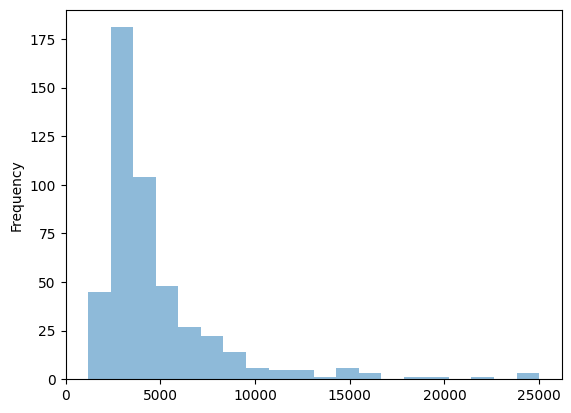

In [49]:
df_flattened["price"].plot.hist(bins=20, alpha=0.5)

<Axes: ylabel='Frequency'>

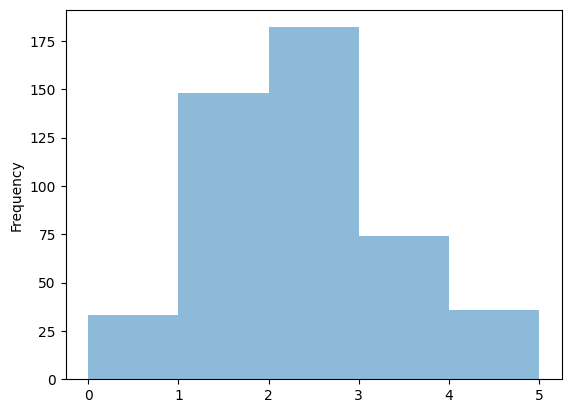

In [50]:
df_flattened["bedrooms"].plot.hist(bins=5, alpha=0.5)


In [51]:
df_flattened["price"].describe()

count      473.000000
mean      4728.243129
std       3318.721364
min       1190.000000
25%       2790.000000
50%       3679.000000
75%       5400.000000
max      25000.000000
Name: price, dtype: float64

12000.0

In [52]:
MIN_PRICE = 1000
MAX_PRICE = np.percentile(df_flattened["price"] , 96)
MAX_BEDROOMS = 5

In [59]:
df_flattened.shape

(473, 55)

In [62]:
df_no_outliers = df_flattened.query("price >= @MIN_PRICE and price <= @MAX_PRICE and bedrooms <= @MAX_BEDROOMS")

In [63]:
df_no_outliers


pa_should_index  created_on  modified_on   listed_on  group_id  \
listing_id                                                                   
52465714              False  1676351728   1681462809  1681847852  -1366822   
49149605               True  1651802047   1681852971  1681600840  49149605   
53137164               True  1682023537   1682099526  1682023537  53137164   
52413477               True  1675949128   1681464068  1675949128  52413477   
52234799               True  1675166104   1682066567  1675166104  52234799   
...                     ...         ...          ...         ...       ...   
52466541              False  1676351895   1681462992  1680826416  -1367020   
52466048              False  1676351806   1680732215  1680502392  -1366892   
47840299              False  1637016114   1680201526  1680201526  -1236612   
48282292              False  1642012360   1678919789  1677511169  -1250200   
40926547              False  1587182697   1678919829  1677511159  -1010902   

                                address       city        lat         lng  \
listing_id                                                                  
52465714            1477 Continental St  Vancouver  49.276100 -123.128980   
49149605         6768 Sherbrooke Street  Vancouver  49.222786 -123.081285   
53137164                1250 Burnaby St  Vancouver  49.281470 -123.135610   
52413477    1678 Pullman Porter St #102  Vancouver  49.271270 -123.103480   
52234799                1949 37th Ave W  Vancouver  49.238460 -123.150220   
...                                 ...        ...        ...         ...   
52466541                  825 8th Ave E  Vancouver  49.263650 -123.086130   
52466048                   1755 Haro St  Vancouver  49.290530 -123.135540   
47840299            1022 Seymour Street  Vancouver  49.278169 -123.122378   
48282292             Drake St & Howe St  Vancouver  49.276761 -123.128797   
40926547           1388 Richards Street  Vancouver  49.274049 -123.126764   

                 pets  ...                                       amenity_tags  \
listing_id             ...                                                      
52465714    [1, 2, 3]  ...  ['Furnished', 'Balcony', 'In-Unit Laundry', 'H...   
49149605       [1, 2]  ...                  ['Dishwasher', 'In-Unit Laundry']   
53137164           []  ...  ['Dishwasher', 'Hardwood Floor', 'Furnished', ...   
52413477           []  ...  ['Furnished', 'Balcony', 'Onsite Laundry', 'Di...   
52234799           []  ...      ['Furnished', 'In-Unit Laundry', 'Fireplace']   
...               ...  ...                                                ...   
52466541    [1, 2, 3]  ...  ['Heat', 'Onsite Laundry', 'Assigned Parking',...   
52466048    [1, 2, 3]  ...  ['Assigned Parking', 'Hot Water', 'Onsite Laun...   
47840299    [1, 2, 3]  ...  ['Assigned Parking', 'Fireplace', 'Onsite Laun...   
48282292    [1, 2, 3]  ...  ['Onsite Laundry', 'In-Unit Laundry', 'Air Con...   
40926547    [1, 2, 3]  ...  ['In-Unit Laundry', 'Air Conditioning', 'Dishw...   

                                        building_amenity_tags all_bathrooms  \
listing_id                                                                    
52465714    ['Onsite Laundry', 'Assigned Parking', 'Dishwa...        [1, 0]   
49149605                                                  NaN        [2, 0]   
53137164    ['Onsite Laundry', 'Swimming Pool', 'Storage',...        [1, 0]   
52413477    ['Onsite Laundry', 'On-Site Management', 'Conc...        [3, 0]   
52234799                  ['Garage Parking', 'Outdoor Space']        [5, 1]   
...                                                       ...           ...   
52466541    ['Onsite Laundry', 'Assigned Parking', 'Hardwo...        [1, 0]   
52466048    ['Onsite Laundry', 'Assigned Parking', 'Dishwa...        [1, 0]   
47840299    ['Onsite Laundry', 'On-Site Management', 'Conc...        [1, 0]   
48282292    ['Onsite Laundry', 'On-Site Management', 'Conc...        [1,